In [1]:
%reset
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
% cd /work/eay/OM4_rerun2/20030101.nc/
fs=xr.open_dataset('20030101.ocean_static_no_mask_table.nc')
lon=fs['geolon']; lat=fs['geolat']
lonu=fs['geolon_u']; latu=fs['geolat_u']
lonv=fs['geolon_v']; latv=fs['geolat_v']
print(fs)


/work2/eay/OM4_rerun2/20030101.nc
<xarray.Dataset>
Dimensions:    (time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * xh         (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh         (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * time       (time) object 1900-01-01 00:00:00
  * xq         (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yq         (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
Data variables:
    areacello  (yh, xh) float32 ...
    geolon     (yh, xh) float32 ...
    geolat     (yh, xh) float32 ...
    geolon_c   (yq, xq) float32 ...
    geolat_c   (yq, xq) float32 ...
    geolon_u   (yh, xq) float32 ...
    geolat_u   (yh, xq) float32 ...
    geolon_v   (yq, xh) float32 ...
    geolat_v   (yq, xh) float32 ...
    wet        (yh, xh) float32 ...
    wet_c      (yq, xq) float32 ...
    wet_u      (yh, xq) float32 ...
    wet_v      (yq, xh) float32 ...
    dxt        (yh, xh) flo

In [27]:
title='2003-12-17' #J16 F15 M17 A16 M17 J15 Jy15 A17 S18 O N D17
data1=xr.open_dataset('20030101.ocean_5daily.nc').sel(time=title)
#print(data1)
salt=data1['so'].isel(zl=0)
temp=data1['thetao'].isel(zl=0)
MLD=data1['MLD_003']
depth=data1['depth_ocean']
massin=data1['net_massin']
massout=data1['net_massout']
#u=nc.Dataset('20030101.ocean_5daily.nc')['uh'][0,0,:,:]
#v=nc.Dataset('20030101.ocean_5daily.nc')['vh'][0,0,:,:]
#u[u>=1e18]=np.nan; v[v>=1e18]=np.nan;
#umag=(u**2+v**2)**0.5 #use nc.Dataset for u,v because xarray causes memory error here
heatflux=data1['net_heat_coupler']
downsaltflux=data1['sfdsi']
data2=xr.open_dataset('20030101.ice_5daily.nc').sel(time=title)
ice=data2['siconc']

print(data1)

<xarray.Dataset>
Dimensions:           (time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080, zi: 76, zl: 75)
Coordinates:
  * xh                (xh) float64 -299.7 -299.5 -299.2 ... 59.53 59.78 60.03
  * yh                (yh) float64 -80.39 -80.31 -80.23 ... 89.73 89.84 89.95
  * time              (time) object 2003-12-17 00:00:00
  * zl                (zl) float64 1.0 3.0 5.0 ... 3.338e+03 3.591e+03 5.111e+03
  * xq                (xq) float64 -299.6 -299.3 -299.1 ... 59.66 59.91 60.16
  * yq                (yq) float64 -80.35 -80.27 -80.19 ... 89.78 89.89 90.0
  * zi                (zi) float64 0.0 2.0 4.0 ... 3.461e+03 3.722e+03 6.5e+03
Data variables:
    zos               (time, yh, xh) float32 ...
    thetao            (time, zl, yh, xh) float32 ...
    so                (time, zl, yh, xh) float32 ...
    uh                (time, zl, yh, xq) float32 ...
    vh                (time, zl, yq, xh) float32 ...
    e                 (time, zi, yh, xh) float32 ...
    MLD_003           (ti

In [28]:
print(data2)

<xarray.Dataset>
Dimensions:   (time: 1, xT: 1440, xTe: 1441, yT: 1080, yTe: 1081)
Coordinates:
  * xT        (xT) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * xTe       (xTe) float64 -299.8 -299.6 -299.3 -299.1 ... 59.66 59.91 60.16
  * yT        (yT) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * yTe       (yTe) float64 -80.43 -80.35 -80.27 -80.19 ... 89.78 89.89 90.0
  * time      (time) object 2003-12-17 00:00:00
Data variables:
    siconc    (time, yT, xT) float32 ...
    sisnconc  (time, yT, xT) float32 ...
    MIB       (time, yT, xT) float32 ...
Attributes:
    filename:   20030101.ice_5daily.nc
    title:      OM4p25_IAF_BLING_csf_rerun_hifreqdiag2_2003-2008
    grid_type:  regular
    grid_tile:  N/A


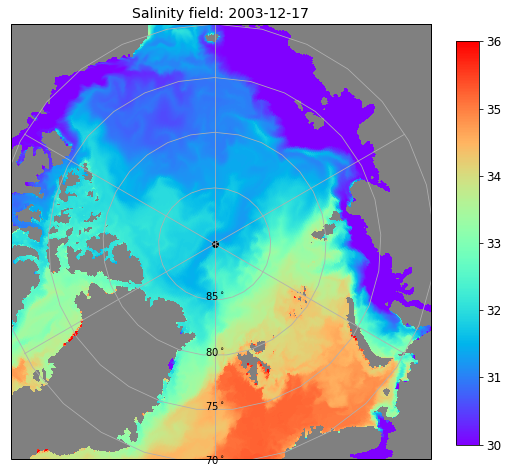

In [29]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,salt[0,:,:],transform=ccrs.PlateCarree(),vmax=36, vmin=30,cmap='rainbow');
plt.colorbar(cax=ax1); ax1.tick_params(labelsize=12)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Salinity field: '+title,fontsize=14)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

In [76]:
#salto=np.squeeze(data1['so'])
#dsalt=np.gradient(salto)
#mask=np.min(dsalt, axis=0)  
#mask[mask >=-0.0] = 0.0
#mask[mask < -0.0] = 1.0

NameError: name 'mask' is not defined

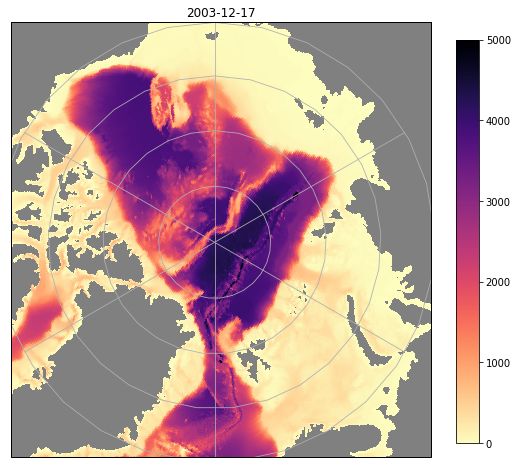

In [30]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))


ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,depth,transform=ccrs.PlateCarree(),vmin=0,vmax=5000,cmap='magma_r');
plt.colorbar(cax=ax1)
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title(title)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(lon, lat, mask==1,color=(0,0,0.5), transform=ccrs.PlateCarree())
ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

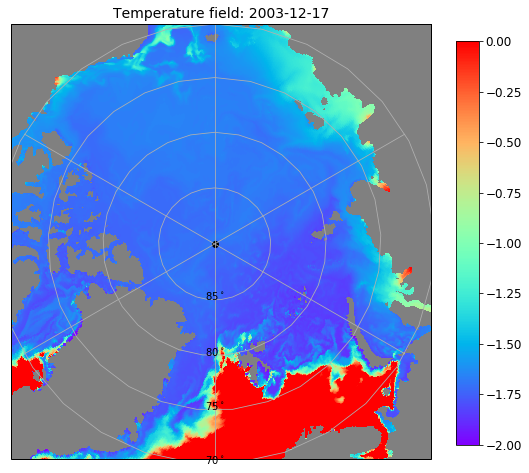

In [31]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,temp[0,:,:],transform=ccrs.PlateCarree(),vmax=0, vmin=-2,cmap='rainbow');
plt.colorbar(cax=ax1); ax1.tick_params(labelsize=12)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Temperature field: '+title,fontsize=14)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

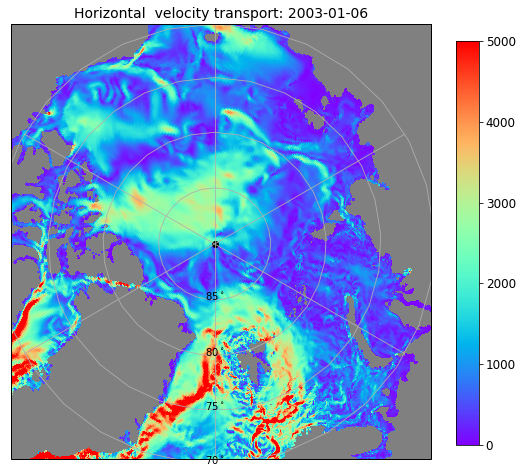

In [6]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lonu, latu,umag[:,:],transform=ccrs.PlateCarree(),vmin=0,vmax=5000,cmap='rainbow');
plt.colorbar(cax=ax1); ax1.tick_params(labelsize=12)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Horizontal  velocity transport: '+title,fontsize=14)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

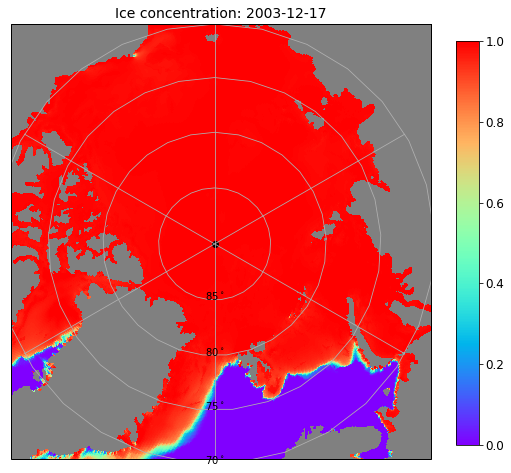

In [32]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,ice[0,:,:],transform=ccrs.PlateCarree(),vmax=1, vmin=0,cmap='rainbow');
plt.colorbar(cax=ax1); ax1.tick_params(labelsize=12)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Ice concentration: '+title,fontsize=14)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

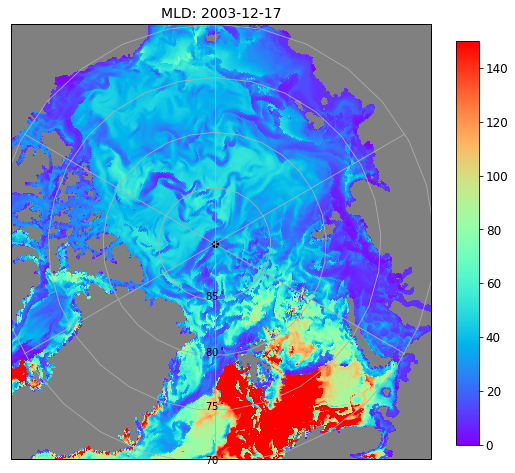

In [33]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,MLD[0,:,:],transform=ccrs.PlateCarree(),vmax=150, vmin=0,cmap='rainbow');
plt.colorbar(cax=ax1); ax1.tick_params(labelsize=12)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('MLD: '+title,fontsize=14)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())


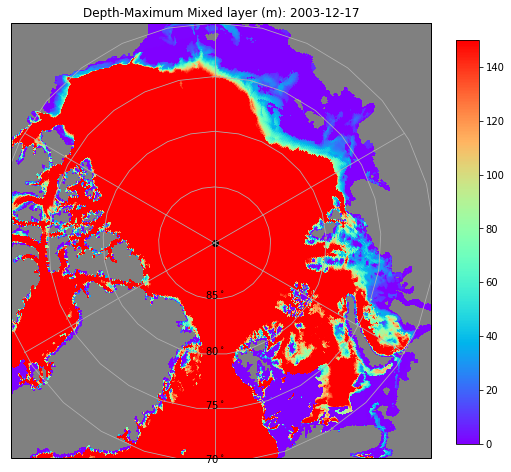

In [34]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))

ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,depth[:,:]-MLD[0,:,:],transform=ccrs.PlateCarree(),cmap='rainbow',vmin=0,vmax=150);
plt.colorbar(cax=ax1)
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Depth-Maximum Mixed layer (m): '+title)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

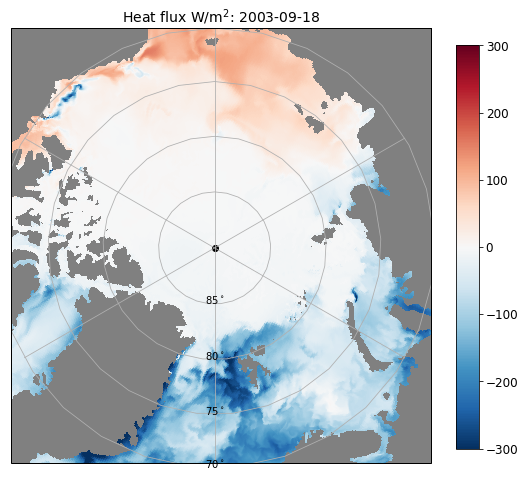

In [23]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,heatflux[0,:,:],transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-300,vmax=300);
plt.colorbar(cax=ax1); ax1.tick_params(labelsize=12)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Heat flux W/m$^2$: '+title,fontsize=14)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

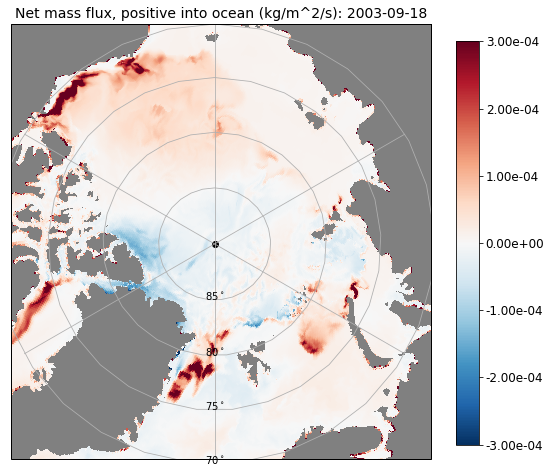

In [24]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,massin[0,:,:]+massout[0,:,:],transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=3e-4,vmax=-3.e-4);
plt.colorbar(cax=ax1,format='%.2e'); ax1.tick_params(labelsize=12)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Net mass flux, positive into ocean (kg/m^2/s): '+title,fontsize=14)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

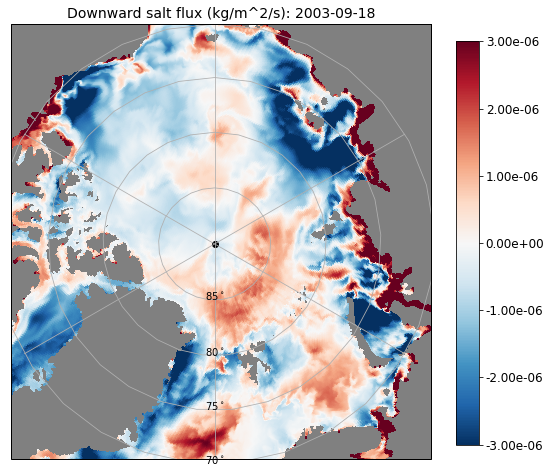

In [25]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,downsaltflux[0,:,:],transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=3e-6,vmax=-3.e-6);
plt.colorbar(cax=ax1,format='%.2e'); ax1.tick_params(labelsize=12)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Downward salt flux (kg/m^2/s): '+title,fontsize=14)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())